# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается 

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [1]:
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [2]:
### абсолютное количество пропусков
df.isna().sum()

CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

In [3]:
# пропуски в процентах
df.isna().sum() * 100 / df.shape[0]

CustomerID                 0.0
Genre                      9.5
Age                       10.0
Annual Income (k$)        10.0
Spending Score (1-100)     0.0
dtype: float64

In [4]:
# посмотрим типы признаков
df.dtypes

CustomerID                  int64
Genre                      object
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)      int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   181 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


Histogram for Genre


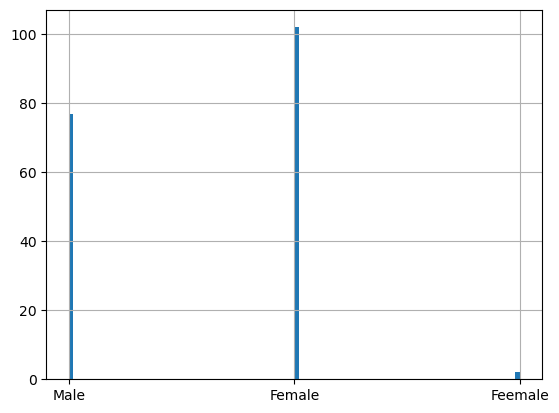

Histogram for Age


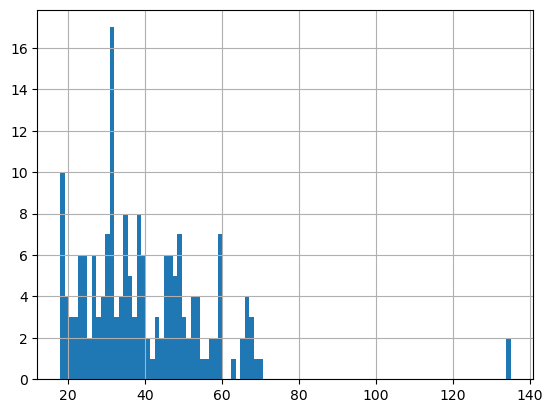

Histogram for Annual Income (k$)


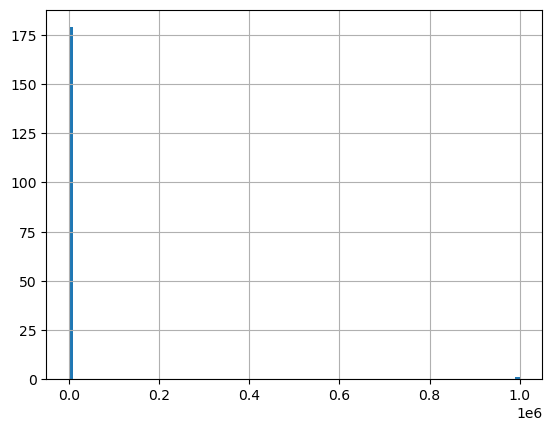

In [7]:
import matplotlib.pyplot as plt

# посмотрим распределения
num_cols = ['Genre', 'Age', 'Annual Income (k$)']
for col in num_cols:
  print(f'Histogram for {col}')
  df[col].hist(bins=100)
  plt.show()

**Вывод**
1. Имеем всего 3 признака, ни один не имеет 50% или более пропусков
2. Признак Genre имеет опечатки - нужно поправить
3. Признак Age имеет 2 отклонения - можно оставить
4. Признак Income имеет выброс - удалить эту строку

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [8]:
# сначала выбросим столбец CustomerID
df.drop('CustomerID', axis=1, inplace = True)

In [9]:
### исправим опечатку
df['Genre'] = df['Genre'].replace('Feemale', 'Female')

Histogram for Genre


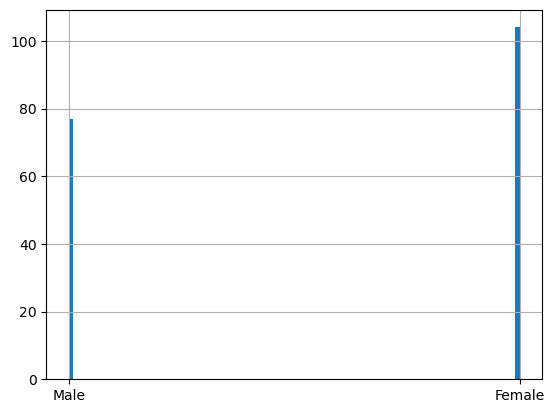

In [10]:
print(f'Histogram for Genre')
df['Genre'].hist(bins=100)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
random_state = 1

Xtrain, Xtest = train_test_split(df, test_size=0.2, random_state=random_state)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [12]:
from sklearn.impute import SimpleImputer

### Пропуски в Genre заполним преобладающим значением - Female
imp_const_unknown = SimpleImputer(strategy='constant', fill_value='Female')

unk_cols = ['Genre']
Xtrain[unk_cols] = imp_const_unknown.fit_transform(Xtrain[unk_cols])
Xtrain.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
108,Male,68.0,63.0,43
107,Male,54.0,63.0,46
189,Female,36.0,103.0,85
14,Male,37.0,20.0,13
56,Female,51.0,44.0,50


In [13]:
# пропуски в числовых признаках заполним медианным значением
imp_median = SimpleImputer(strategy='median')

med_cols = ['Age', 'Annual Income (k$)']

Xtrain[med_cols] = imp_median.fit_transform(Xtrain[med_cols])
Xtrain.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
108,Male,68.0,63.0,43
107,Male,54.0,63.0,46
189,Female,36.0,103.0,85
14,Male,37.0,20.0,13
56,Female,51.0,44.0,50


In [14]:
# проверим  пропуски в процентах
Xtrain.isna().sum() * 100 / df.shape[0]

Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


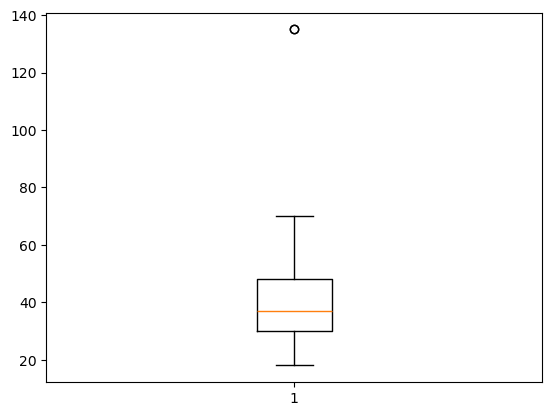

In [15]:
plt.boxplot(Xtrain['Age'])
plt.show()

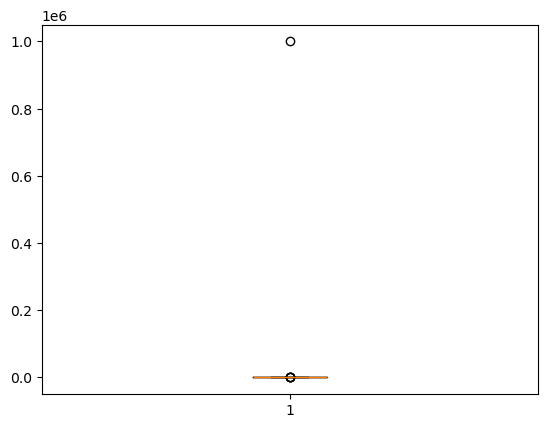

In [16]:
plt.boxplot(Xtrain['Annual Income (k$)'])
plt.show()

In [17]:
### вычисление  границ для поиска выбросов
def calculate_iqr_boundaries(series):
  q25 = series.quantile(0.25)
  q75 = series.quantile(0.75)
  iqr = q75 - q25

  boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
  return boundaries

In [18]:
# Будем заменять выбросы граичными значениями
age_bounds=calculate_iqr_boundaries(Xtrain['Age'])
age_bounds

(3.0, 75.0)

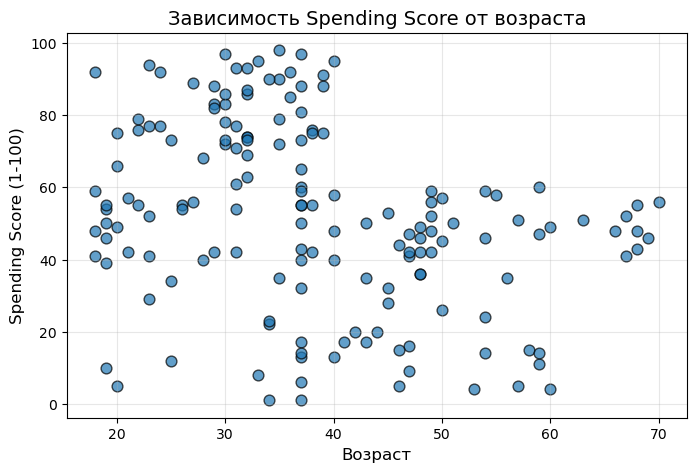

In [19]:
# Посмотрим распределение в границах
Xtrain_age=Xtrain[(Xtrain['Age'] >= age_bounds[0]) & (Xtrain['Age'] <= age_bounds[1])]

# Строим график
plt.figure(figsize=(8, 5))
plt.scatter(
    Xtrain_age['Age'], 
    Xtrain_age['Spending Score (1-100)'], 
    alpha=0.7,              # прозрачность точек
    edgecolor='k',          # чёрная окантовка
    s=60                    # размер точек
)

# график рассеяния
plt.title("Зависимость Spending Score от возраста", fontsize=14)
plt.xlabel("Возраст", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

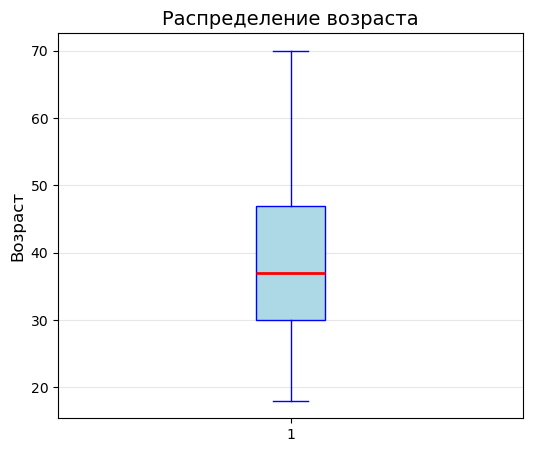

In [20]:
plt.figure(figsize=(6, 5))
plt.boxplot(
    Xtrain_age['Age'],
    vert=True,           # вертикальный ящик (можно vert=False для горизонтального)
    patch_artist=True,   # закрашенный ящик
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red", linewidth=2),
    whiskerprops=dict(color="blue"),
    capprops=dict(color="blue"),
    flierprops=dict(marker="o", markerfacecolor="orange", markersize=6, linestyle="none")
)

plt.title("Распределение возраста", fontsize=14)
plt.ylabel("Возраст", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.show()

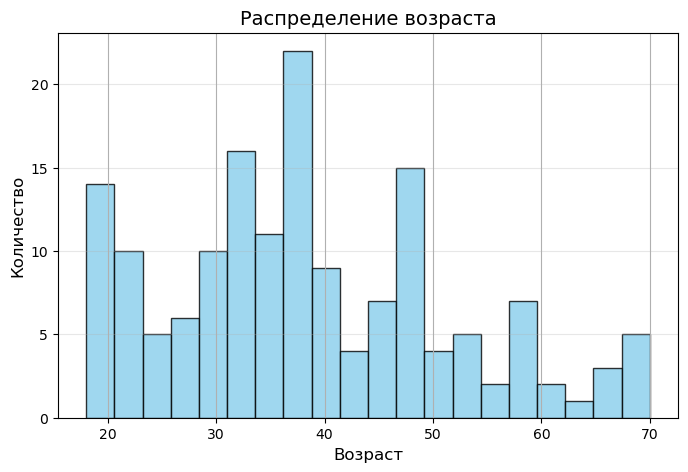

In [21]:
plt.figure(figsize=(8, 5))
Xtrain_age['Age'].hist(
    bins=20,               # количество интервалов 
    color="skyblue",       # цвет столбиков
    edgecolor="black",     # окантовка
    alpha=0.8              # прозрачность
)

plt.title("Распределение возраста", fontsize=14)
plt.xlabel("Возраст", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.show()

In [22]:
income_bounds=calculate_iqr_boundaries(Xtrain['Annual Income (k$)'])
income_bounds

(4.375, 117.375)

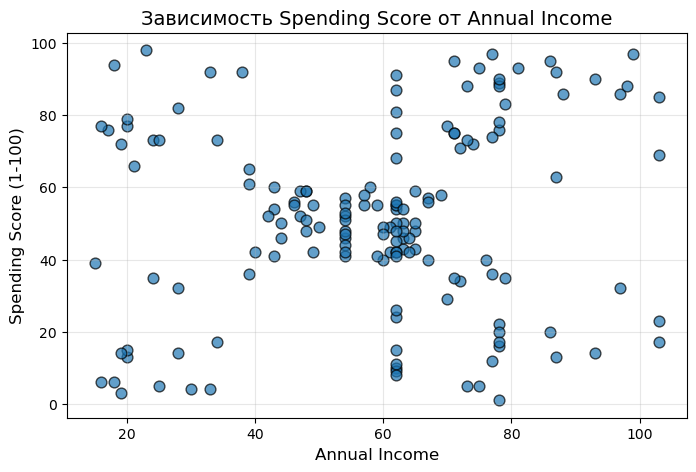

In [23]:
# построитм такие же графики

Xtrain_income=Xtrain[(Xtrain['Annual Income (k$)'] >= income_bounds[0]) & (Xtrain['Annual Income (k$)'] <= income_bounds[1])]

# Строим график
plt.figure(figsize=(8, 5))
plt.scatter(
    Xtrain_income['Annual Income (k$)'], 
    Xtrain_income['Spending Score (1-100)'], 
    alpha=0.7,              # прозрачность точек
    edgecolor='k',          # чёрная окантовка
    s=60                    # размер точек
)

# график рассеяния
plt.title("Зависимость Spending Score от Annual Income", fontsize=14)
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

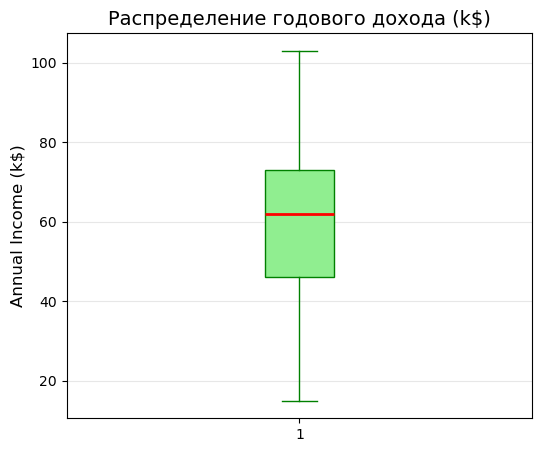

In [24]:
plt.figure(figsize=(6, 5))
plt.boxplot(
    Xtrain_income['Annual Income (k$)'],
    vert=True,           # вертикальный бокс-плот
    patch_artist=True,   # закрашенный ящик
    boxprops=dict(facecolor="lightgreen", color="green"),
    medianprops=dict(color="red", linewidth=2),
    whiskerprops=dict(color="green"),
    capprops=dict(color="green"),
    flierprops=dict(marker="o", markerfacecolor="orange", markersize=6, linestyle="none")
)

plt.title("Распределение годового дохода (k$)", fontsize=14)
plt.ylabel("Annual Income (k$)", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.show()

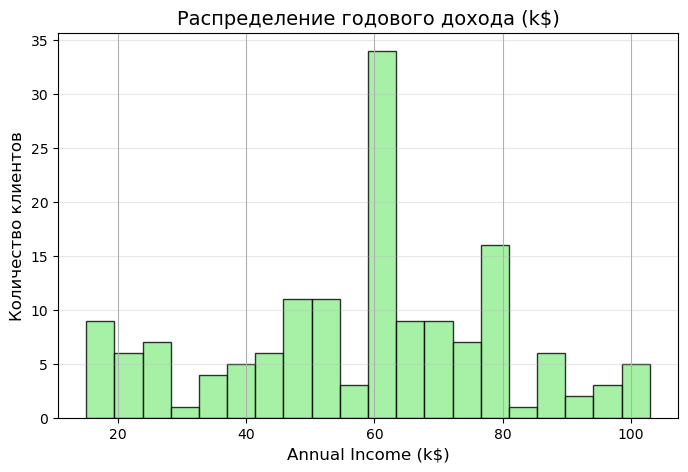

In [25]:
plt.figure(figsize=(8, 5))
Xtrain_income['Annual Income (k$)'].hist(
    bins=20,               # сгруппируем доход в 20 корзин
    color="lightgreen",    # цвет столбиков
    edgecolor="black",     # окантовка
    alpha=0.8              # прозрачность
)

plt.title("Распределение годового дохода (k$)", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Количество клиентов", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.show()

In [26]:
Xtrain.shape

(160, 4)

In [27]:
# заменяем выбросы на граничные занчения
def cap_outliers(series):
    """
    Заменяет выбросы на граничные значения,
    вычисленные функцией calculate_iqr_boundaries.
    """
    lower, upper = calculate_iqr_boundaries(series)
    return series.clip(lower, upper)

# Пример: обработаем Age и Annual Income
Xtrain['Age'] = cap_outliers(Xtrain['Age'])
Xtrain['Annual Income (k$)'] = cap_outliers(Xtrain['Annual Income (k$)'])

In [28]:
Xtrain.shape

(160, 4)

**Итог**\
Выбросы по признаках 'Age' и 'Annual Income (k$)' заменили на граичные значения. Это не сломает модель обучения

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [29]:
### Гистограмма распределения выглядит достаточно равномерной, поэтому достаточно выполнить MinMax
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

In [30]:
num_cols = ['Age', 'Annual Income (k$)']
# копируем Xtrain, чтобы не портить оригинал
Xtrain_scaled = Xtrain.copy()

# применяем масштабирование только к числовым признакам
Xtrain_scaled[num_cols] = mmscaler.fit_transform(Xtrain[num_cols])

In [31]:
# теперь и для тестовой выборки
# сначала создаём копию тестовой выборки
Xtest_scaled = Xtest.copy()

Xtest_scaled[num_cols] = mmscaler.transform(Xtest[num_cols])

<Axes: >

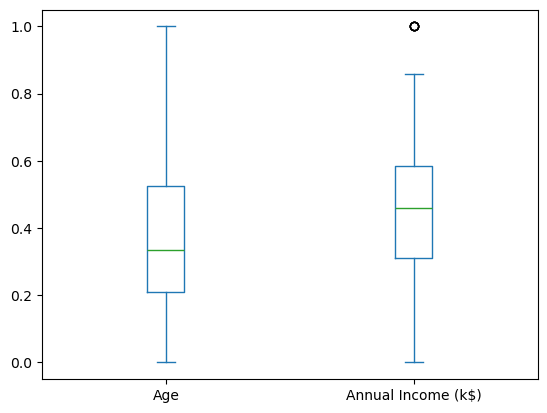

In [32]:
Xtrain_scaled[num_cols].plot(kind='box')

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [33]:
### воспользуемся бинарной кодировкой
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Xtrain_scaled['Genre'] = le.fit_transform(Xtrain_scaled['Genre'])
Xtrain_scaled.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
108,1,0.877193,0.468864,43
107,1,0.631579,0.468864,46
189,0,0.315789,0.859585,85
14,1,0.333333,0.048840,13
56,0,0.578947,0.283272,50


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [34]:
### заполним пропсуски в Genre
Xtest_scaled[unk_cols] = imp_const_unknown.fit_transform(Xtest_scaled[unk_cols])
Xtest_scaled.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
58,Female,0.157895,0.302808,51
40,Female,0.824561,0.224664,35
34,Female,0.543860,0.175824,14
102,Male,0.859649,0.459096,59
184,Female,0.403509,0.820513,39


In [35]:
Xtest_scaled['Genre'] = le.fit_transform(Xtest_scaled['Genre'])

In [36]:
# пропуски в числовых признаках заполним медианным значением

Xtest_scaled[med_cols] = imp_median.fit_transform(Xtest_scaled[med_cols])
Xtest_scaled.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
58,0,0.157895,0.302808,51
40,0,0.824561,0.224664,35
34,0,0.543860,0.175824,14
102,1,0.859649,0.459096,59
184,0,0.403509,0.820513,39


**Итог**
1. Заполнены пропуски в категориальном признаке Genre
2. Закодирован категориальный признак Genre в бинарные значения 0 и 1 (0 = Male и 1 = Female)
3. Выбромы в признаках  'Age'и 'Annual Income (k$)' заменены на граничные значения
4. Значения в признаках  'Age'и 'Annual Income (k$)' отмасштабированы с помощью MinMaxScaler